<a href="https://colab.research.google.com/github/caiomorozini/python-signal-processing/blob/main/Caio_Fernandes_Morozini_lista3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.fft as scifft

# Questão 1.a
Escreva uma função em python que gere o sinal a baixo.
<center>y = cos(2 ∗ π ∗ 2.5 ∗ t)</center>

---

# Faça a transformada de Fourier para o sinal com duração de 1 , 2 e 3 seg.
fs = 100 Hz. Observe o que ocorre com o sinal da magnitude.

### Variáveis Globais


In [3]:
pi = np.pi
fs = 100
T = 1/fs

### Sinal no tempo

In [4]:
t = [np.arange(0,tf,T) for tf in range(1,4)]
signals = [np.cos(2*pi*2.5*value) for value in t]

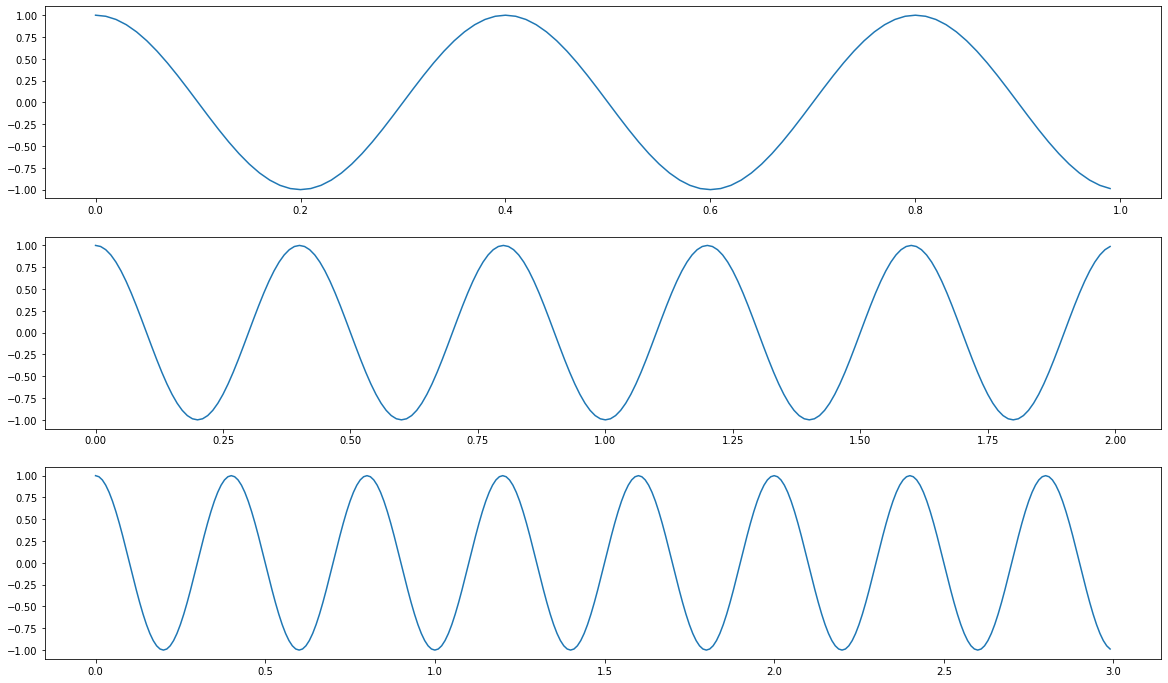

In [5]:
plt.figure(figsize= (20,12))
for index, signal in enumerate(signals):
  plt.subplot(3,1,index+1)
  plt.plot(t[index],signal)
plt.show()

### Calculando transformada

In [6]:
def espectral(signals, fs):
  fft_signals = [scifft.fft(signal) for signal in signals]
  magnitudes = [np.absolute(fft_signal) for fft_signal in fft_signals]
  dfs = [fs/magnitude.shape[0] for magnitude in magnitudes]
  freq = [np.arange(0,fs,df) for df in dfs]
  return [magnitude/magnitude.shape[0] for magnitude in magnitudes], freq


def espectral_plot(normalized_magnitude, freq, **kwargs):
  plt.figure(figsize= (20,5))
  max_x = kwargs.get('xlim')
  stem = kwargs.get('stem')
  for index, signal in enumerate(normalized_magnitude):
    plt.subplot(1,3,index+1)
    plt.title(f'FFT para {index}s')
    if stem:
      plt.stem(freq[index],signal)
    else:
      plt.plot(freq[index],signal)
    if max_x:
      plt.xlim([0,max_x])
    else:
      plt.xlim([0,fs/2])


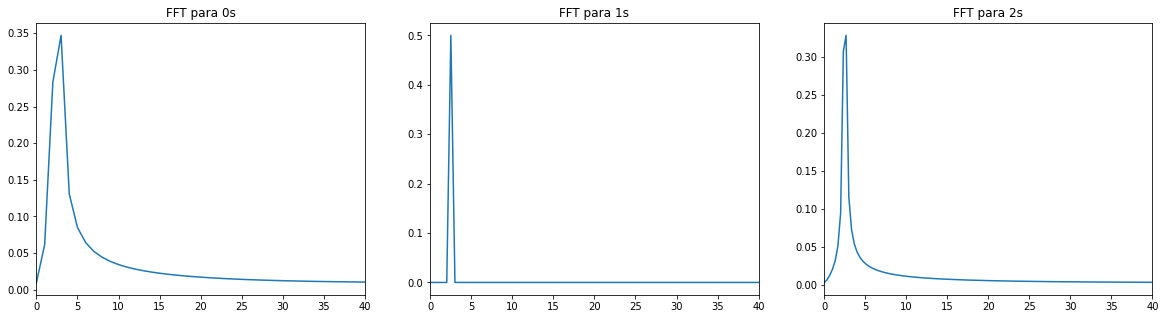

In [7]:
normalized_magnitude, freq = espectral(signals,fs)
espectral_plot(normalized_magnitude,freq,xlim=40)

# Questão 1.b
Faça a transformada de Fourier dos sinais gerados com utilizando
preenchimento de zeros de 1 e 2 ordem. Compare com os resultados
obtidos com o item anterior.

---

FFT com zero padding de primeira ordem

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning 

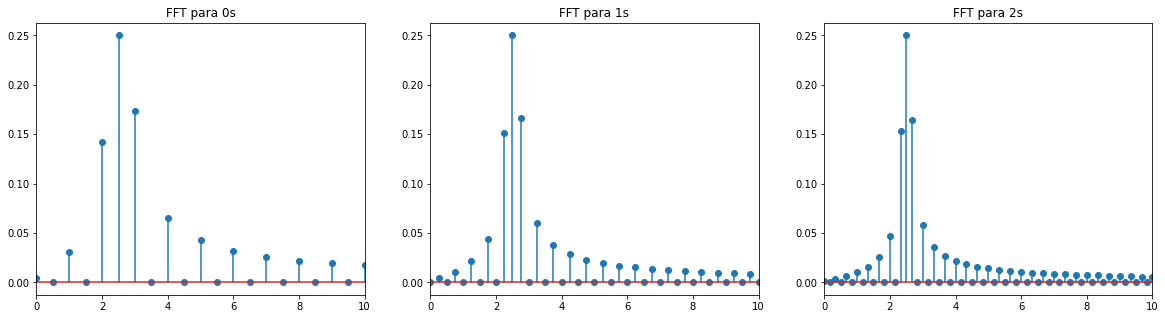

In [16]:
z = [np.zeros_like(signal) for signal in signals]
signal_pad = [np.hstack((signal,z[index])) for index, signal in enumerate(signals)]
normalized_pad, freq_pad = espectral(signal_pad,fs)
espectral_plot(normalized_pad, freq_pad, xlim=10, stem=True)

FFT com zero padding de segunda ordem

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning 

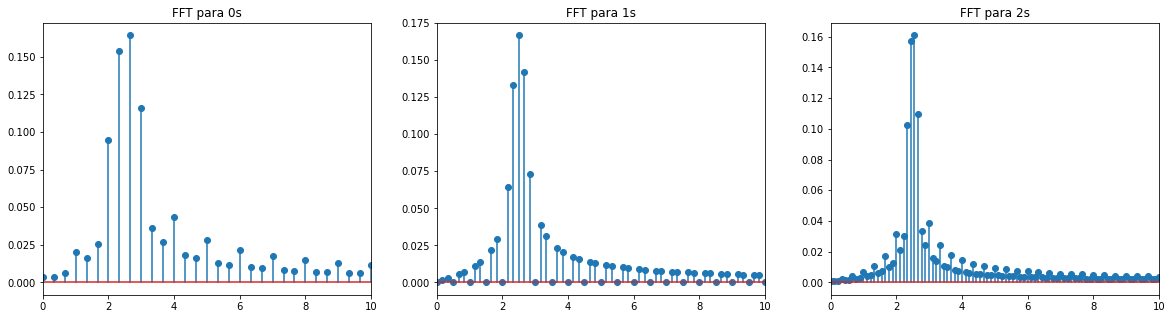

In [9]:
signal_pad2 = ([np.hstack((signal,z[index],z[index])) for index, signal in enumerate(signals)])
normalized_pad2, freq_pad2 = espectral(signal_pad2,fs)
espectral_plot(normalized_pad2, freq_pad2, xlim=10, stem=True)

# Questão 1c
Repita o item b somente utilizando o sinal de 1s. utilizando as seguintes
Janelas triangular, Hanning, hamming, e flattop. Discuta as diferenças
entre as janelas no espectro de magnitude.

In [10]:
from scipy.signal import find_peaks
from scipy import signal as flat

In [11]:
k = 5 #@param {type:"slider", min:0, max:5, step:1}
NUMBER = 0 # Sinal com 1 segundo
s1 = signals[NUMBER]
t1 = np.arange(0,1,T)

s1_pad = signal_pad[NUMBER]
s1_pad2 = signal_pad2[NUMBER]

In [12]:
janelas_pad = {
    'triangular': np.bartlett(np.size(s1_pad)),
    'hanning': np.hanning(np.size(s1_pad)),
    'hamming': np.hamming(np.size(s1_pad)),
    'flattop': flat.flattop(np.size(s1_pad)),
}
janelas_pad2 = {
    'triangular': np.bartlett(np.size(s1_pad2)),
    'hanning': np.hanning(np.size(s1_pad2)),
    'hamming': np.hamming(np.size(s1_pad2)),
    'flattop': flat.flattop(np.size(s1_pad2)),
}

# Houve necessidade de criar um espectral para um único sinal para não alterar código.
def espectral_single(signal, fs, **kwargs):
  len = kwargs.get('len')
  window = kwargs.get('w')
  if window is not None:
    fft_signal = np.fft.fft(signal*window,(len+1)*signal.shape[0])/signal.shape[0]
  else:
    fft_signal = np.fft.fft(signal)

  fft_signal = np.abs(fft_signal)
  fft_signal = np.fft.fftshift(fft_signal)
  freq = np.arange(0,fs,fs/fft_signal.shape[0])-fs/2
  return fft_signal, freq

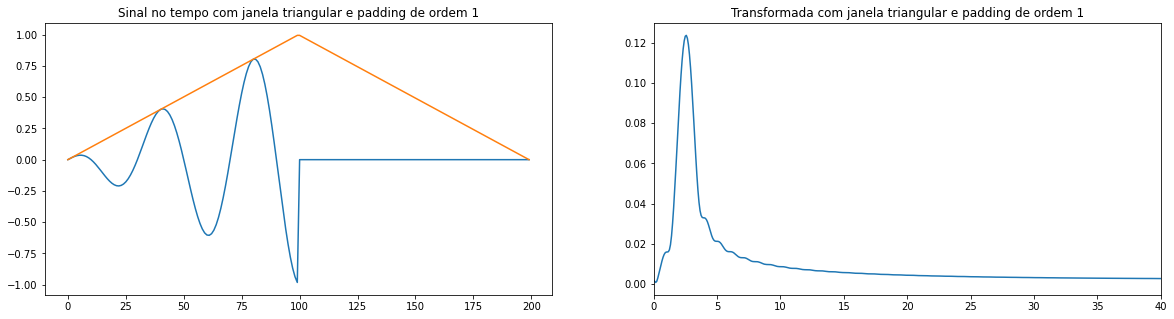

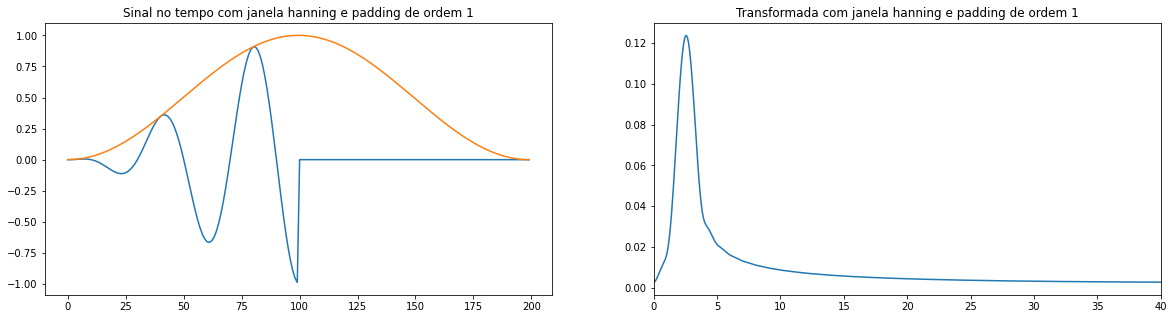

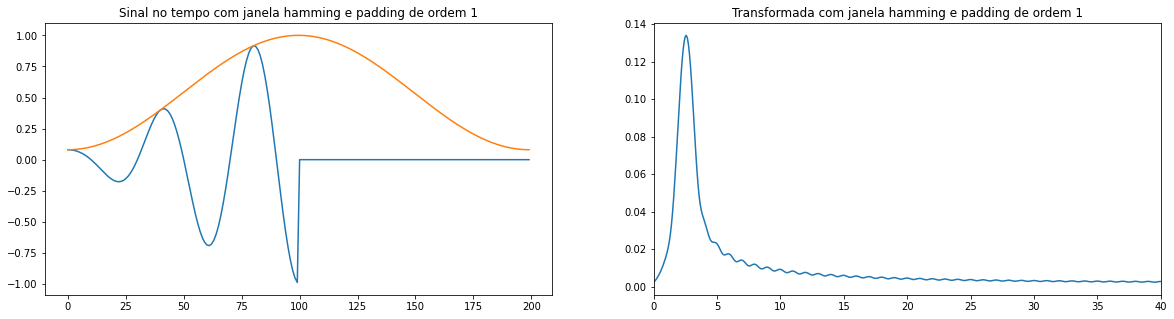

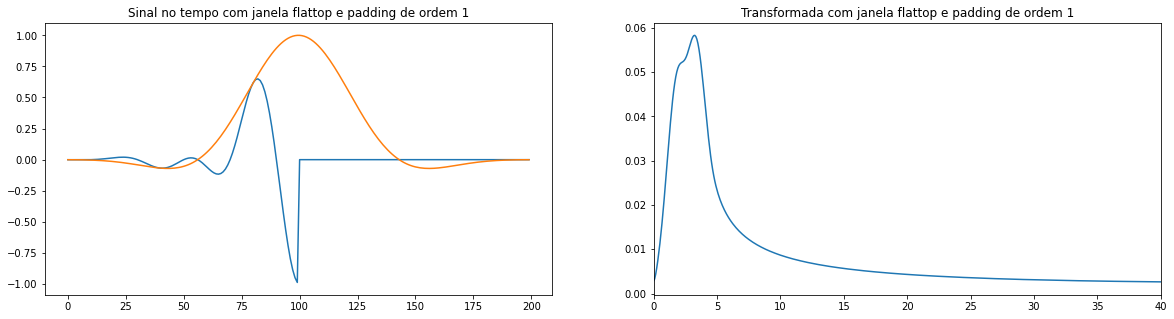

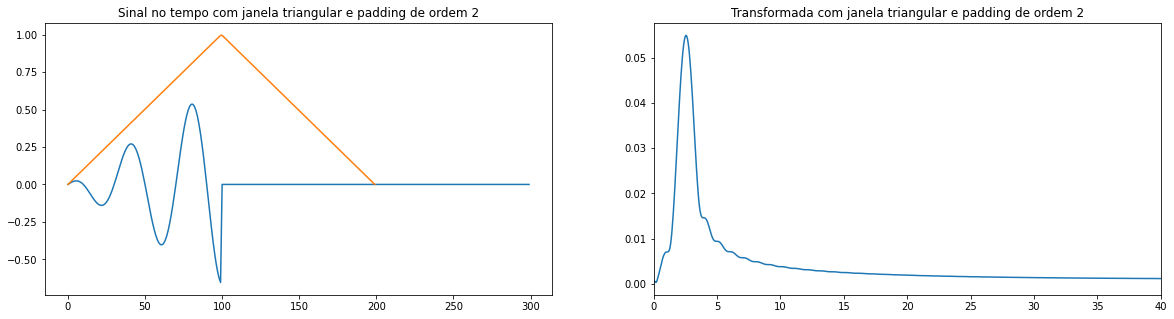

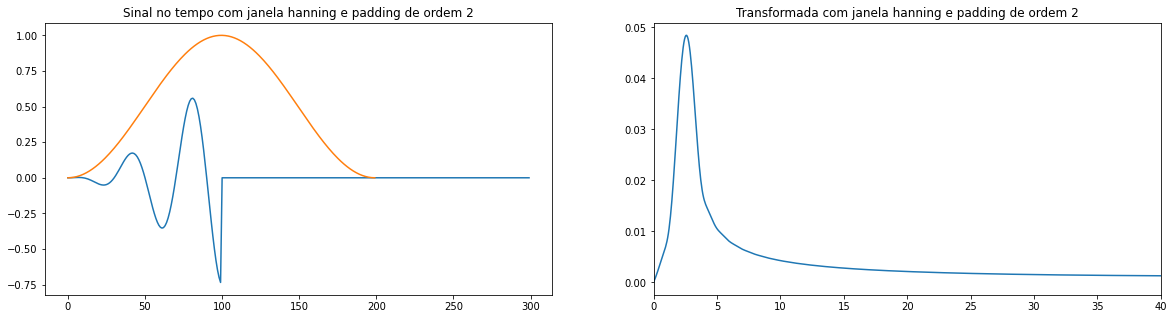

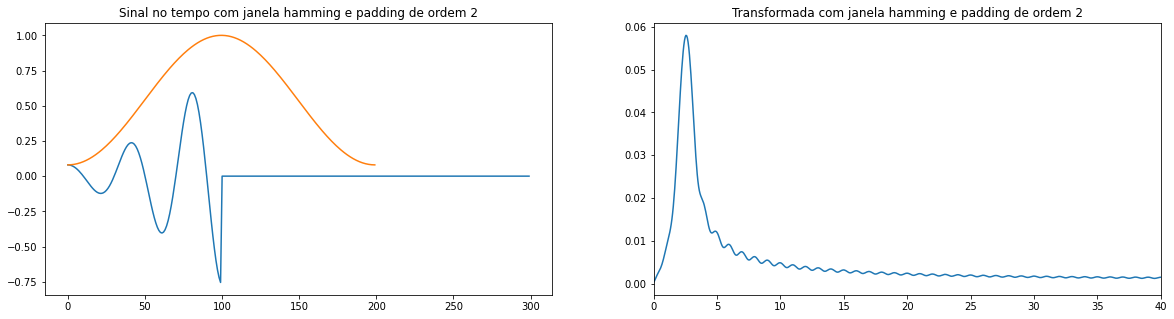

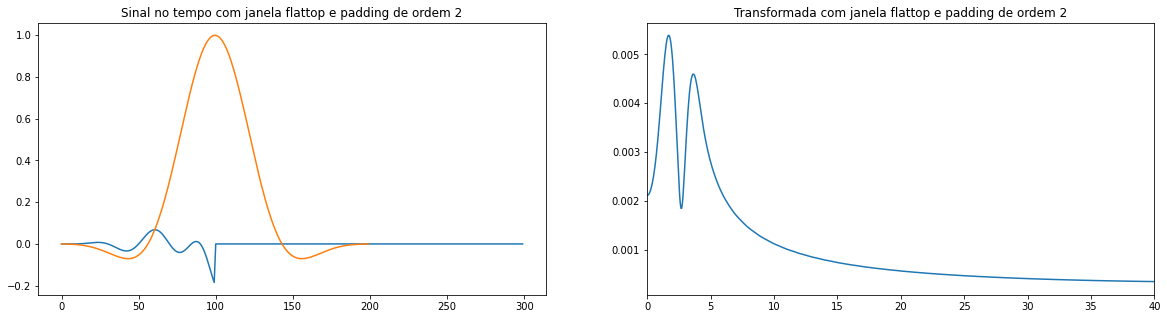

In [14]:

fft_p1 = {tipo : espectral_single(s1_pad, fs, len=k, w=janela) for (tipo, janela) in janelas_pad.items()}

fft_p2 = {tipo : espectral_single(s1_pad2, fs, len=k, w=janela) for (tipo, janela) in janelas_pad2.items()}

for tipo, janela in fft_p1.items():
  plt.figure(figsize=(20,5))
  plt.subplot(121)
  plt.title(f'Sinal no tempo com janela {tipo} e padding de ordem 1')
  plt.plot(s1_pad*janelas_pad.get(tipo))
  plt.plot(janelas_pad.get(tipo))

  plt.subplot(122)
  plt.title(f'Transformada com janela {tipo} e padding de ordem 1')
  plt.plot(janela[1],janela[0])
  plt.xlim([0,40])

for tipo, janela in fft_p2.items():
  plt.figure(figsize=(20,5))
  plt.subplot(121)
  plt.title(f'Sinal no tempo com janela {tipo} e padding de ordem 2')
  plt.plot(s1_pad2*janelas_pad2.get(tipo))
  plt.plot(janelas_pad.get(tipo))

  plt.subplot(122)
  plt.title(f'Transformada com janela {tipo} e padding de ordem 2')
  plt.plot(janela[1],janela[0])
  plt.xlim([0,40])
  

# Questão 2a
O processo downsample (reamostragem) constitui na diminuição digital (via
software) dos dados amostrados. Este processo sempre é em múltiplos inteiros.
Exemplo um sinal coletado com a frequência de amostragem de 1000 Hz pode
ser reamostrado para 500(2), 334(3), 250(4). O arquivo O toque_icq.wav contém
o gravação com duração de 3 segundos e frequência de amostragem de 44.1kHz.

---

A) Faça a transformada de Fourier do sinal utilizando a janela hamming e plote
o gráfico do espectro de energia. Indique qual é a frequência de nyquist.

In [ ]:
from scipy.io import wavfile
data = wavfile.read('Toque_icq.wav')


In [ ]:
fs = data[0]

In [ ]:
signal = data[1:][0]

In [ ]:
T = 1/fs
t = np.arange(0,3,T)
hamming = np.hamming(np.size(signal))

In [ ]:
fft, freq = espectral_single(signal,fs, w= hamming, len=1)

In [ ]:
eg = fft**2/fft.shape[0]

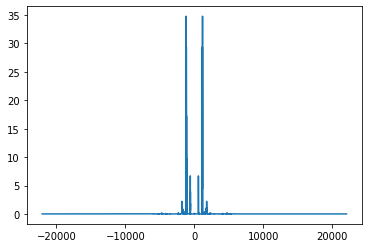

In [ ]:
plt.plot(freq,eg)